In [ ]:
!pip install mlflow scikit-learn pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.7/629.7 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.6 MB/s eta 0:00:00


Mount Google Drive in Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Set the MLflow Tracking Directory or for Accessing the Logs Later

In [ ]:
import mlflow

# From my folder on drive "MyDrive/MLflow_Logs"
mlflow.set_tracking_uri("file:///content/drive/MyDrive/MLflow_Logs")

Load and Prepare the Dataset

In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Preprocessing
# Fill missing values
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna('S')

# One-hot encode categorical features
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Select features and target
X = data[['Pclass', 'Age', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = data['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the datasets
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Train target distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Test target distribution:\n{y_test.value_counts(normalize=True)}")

Train shape: (712, 6), Test shape: (179, 6)
Train target distribution:
Survived
0    0.623596
1    0.376404
Name: proportion, dtype: float64
Test target distribution:
Survived
0    0.586592
1    0.413408
Name: proportion, dtype: float64


Set Up MLflow Experiment

In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
from sklearn.model_selection import train_test_split

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Preprocessing
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna('S')
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Features and target
X = data[['Pclass', 'Age', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = data['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MLflow setup
mlflow.set_experiment("Titanic Survival Prediction with RF")

with mlflow.start_run() as run:
    # Model training
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")

    # Logging to MLflow
    mlflow.log_param("Model Type", "RandomForest")
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("Dataset Size", len(data))
    mlflow.log_param("Feature Columns", list(X.columns))
    mlflow.log_metric("Accuracy", acc)
    mlflow.log_metric("F1 Score", f1)

    # Create an input example (e.g., the first row of the training dataset)
    input_example = X_train.iloc[0].to_dict()

    # Model serialization
    mlflow.sklearn.log_model(model, "random_forest_model", input_example=input_example)

    # Print Run ID and metrics
    run_id = run.info.run_id
    print(f"Run ID: {run_id}")
    print(f"Model Accuracy: {acc}, F1 Score: {f1}")

/usr/local/lib/python3.10/dist-packages/mlflow/types/utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlflow/types/utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference tim

Run ID: dff6a5ba81484eb1967a55cff8f08b40
Model Accuracy: 0.7988826815642458, F1 Score: 0.7992565535023636


View Experiment Logs
Check the MLflow_Logs folder: https://drive.google.com/drive/folders/1hi9qaD4YOoOPVgOoApOmUmFKCt3ma49C?usp=sharing

It will include:
Parameters (e.g., model type, solver).
Metrics (e.g., accuracy).
Model artifacts (the saved model).

Repeat for Comparison

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

with mlflow.start_run() as run:
    # Log model parameters
    mlflow.log_param("model_type", "Random Forest")
    mlflow.log_param("n_estimators", 100)

    # Train the model
    model_rf.fit(X_train, y_train)

    # Make predictions and calculate metrics
    y_pred_rf = model_rf.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    f1_rf = f1_score(y_test, y_pred_rf, average="weighted")

    # Log metrics
    mlflow.log_metric("accuracy", accuracy_rf)
    mlflow.log_metric("f1_score", f1_rf)

    # Log the trained model with input example
    input_example = X_train.iloc[0].to_dict()
    mlflow.sklearn.log_model(model_rf, "random_forest_comparison", input_example=input_example)

    # Print Run ID and metrics
    run_id = run.info.run_id
    print(f"Run ID: {run_id}")
    print(f"Model Accuracy: {accuracy_rf}, F1 Score: {f1_rf}")

/usr/local/lib/python3.10/dist-packages/mlflow/types/utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlflow/types/utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference tim

Run ID: 11816209a1d24a2b9b2734ba8eb593f4
Model Accuracy: 0.7988826815642458, F1 Score: 0.7992565535023636


View Experiment Logs after Repeating
Check the MLflow_Logs folder: https://drive.google.com/drive/folders/1hi9qaD4YOoOPVgOoApOmUmFKCt3ma49C?usp=sharing

Visualize Metrics in MLflow UI

In [ ]:
!pip install mlflow pyngrok

In [ ]:
# Start the MLflow Tracking Server
import os
from pyngrok import ngrok

# Set the tracking URI to a local directory
os.makedirs("mlruns", exist_ok=True)
mlflow.set_tracking_uri("file://mlruns")

# Start MLflow UI
!mlflow ui --port 5000 --host 0.0.0.0 &

# Expose the port using ngrok
public_url = ngrok.connect(port=5000)
print("MLflow Tracking UI:", public_url)

In [ ]:
mlflow.set_experiment("Titanic Survival Prediction with RF")

with mlflow.start_run():
    # Example: Log parameters, metrics, and model
    mlflow.log_param("model_type", "Random Forest")
    mlflow.log_metric("accuracy", 0.85)
    mlflow.sklearn.log_model(model, "model")

In [ ]:
#!mlflow ui --host 0.0.0.0 --port 5000

[2025-01-03 04:56:33 +0000] [8095] [INFO] Starting gunicorn 23.0.0
[2025-01-03 04:56:33 +0000] [8095] [INFO] Listening at: http://0.0.0.0:5000 (8095)
[2025-01-03 04:56:33 +0000] [8095] [INFO] Using worker: sync
[2025-01-03 04:56:33 +0000] [8096] [INFO] Booting worker with pid: 8096
[2025-01-03 04:56:33 +0000] [8097] [INFO] Booting worker with pid: 8097
[2025-01-03 04:56:33 +0000] [8098] [INFO] Booting worker with pid: 8098
[2025-01-03 04:56:33 +0000] [8103] [INFO] Booting worker with pid: 8103
[2025-01-03 05:45:37 +0000] [8095] [INFO] Handling signal: int

Aborted!
[2025-01-03 05:45:37 +0000] [8096] [INFO] Worker exiting (pid: 8096)
[2025-01-03 05:45:37 +0000] [8098] [INFO] Worker exiting (pid: 8098)
[2025-01-03 05:45:37 +0000] [8097] [INFO] Worker exiting (pid: 8097)
[2025-01-03 05:45:37 +0000] [8103] [INFO] Worker exiting (pid: 8103)
[2025-01-03 05:45:39 +0000] [8095] [INFO] Shutting down: Master


Collect the accuracy scores and run IDs and Plot Results for Comparison

In [ ]:
import mlflow
import pandas as pd
import matplotlib.pyplot as plt

# Initialize a list to store run IDs and accuracies
accuracy_scores = []

# Correctly search for runs from the experiment
runs_df = mlflow.search_runs(experiment_ids="Titanic Survival Prediction")

# Print the columns of the DataFrame to inspect them
print("Columns in runs_df:", runs_df.columns)

# Example of logging accuracies and run IDs for each model run
for _, run in runs_df.iterrows():
    run_id = run['run_id']  # Ensure 'run_id' exists in the DataFrame
    accuracy = run['metrics.accuracy']  # Ensure 'metrics.accuracy' exists in the DataFrame

    # Append to the list
    accuracy_scores.append({'run_id': run_id, 'accuracy': accuracy})

# Convert the list to a DataFrame for easier handling
accuracy_scores_df = pd.DataFrame(accuracy_scores)

# Print the columns of the new DataFrame to inspect them
print("Columns in accuracy_scores_df:", accuracy_scores_df.columns)

# plot the results
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores_df['run_id'], accuracy_scores_df['accuracy'], color='skyblue')
plt.xlabel('Run ID')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison Across Runs')
plt.xticks(rotation=45)
plt.show()

Offline Evaluation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Perturbation Tests: Evaluate model robustness by introducing noise or variations in the test data

In [ ]:
# --- 1. Perturb data by adding noise to the features ---
noise = np.random.normal(0, 0.1, X_test.shape)  # Adding small Gaussian noise
X_test_noisy = X_test + noise

# Evaluate the model on noisy data
y_pred_noisy = model_rf.predict(X_test_noisy)
accuracy_noisy = accuracy_score(y_test, y_pred_noisy)

print(f"Accuracy on noisy data: {accuracy_noisy}")

Accuracy on noisy data: 0.7877094972067039


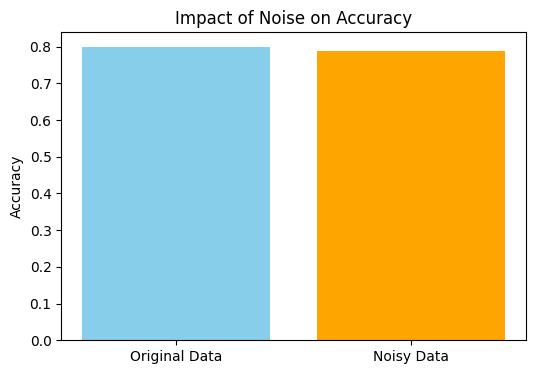

In [ ]:
# Visualization
plt.figure(figsize=(6, 4))
plt.bar(['Original Data', 'Noisy Data'], [accuracy_rf, accuracy_noisy], color=['skyblue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Impact of Noise on Accuracy')
plt.show()

Invariance Tests: Ensure the model's predictions remain consistent when sensitive features (like gender) are altered or removed.

In [ ]:
# --- 2. Fairness Evaluation: Remove 'Sex_male' feature ---
X_train_fairness = X_train.drop(columns=['Sex_male'])
X_test_fairness = X_test.drop(columns=['Sex_male'])

# Train the model with the modified data (without 'Sex_male' feature)
model_rf_fairness = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf_fairness.fit(X_train_fairness, y_train)

# Make predictions and calculate accuracy with the modified data
y_pred_fairness = model_rf_fairness.predict(X_test_fairness)
accuracy_fairness = accuracy_score(y_test, y_pred_fairness)

print(f"Accuracy without 'Sex_male' feature: {accuracy_fairness}")

Accuracy without 'Sex_male' feature: 0.7150837988826816


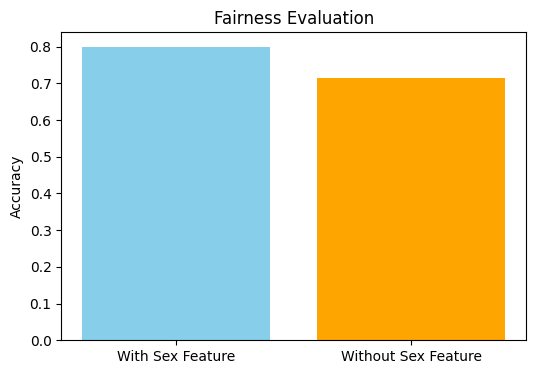

In [ ]:
#Visualization
plt.figure(figsize=(6, 4))
plt.bar(['With Sex Feature', 'Without Sex Feature'], [accuracy_rf, accuracy_fairness], color=['skyblue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Fairness Evaluation')
plt.show()

Directional Expectation Tests: Verify outputs change predictably when certain inputs are adjusted logically.

In [ ]:
# --- 3. Directional Test: Increase 'Fare' values ---
X_test_directional = X_test.copy()
X_test_directional['Fare'] = X_test_directional['Fare'] * 1.5  # Increase fare values by 50%

# Predict with modified input
y_pred_directional = model_rf.predict(X_test_directional)
accuracy_directional = accuracy_score(y_test, y_pred_directional)

print(f"Accuracy after increasing 'Fare' by 50%: {accuracy_directional}")

Accuracy after increasing 'Fare' by 50%: 0.7653631284916201


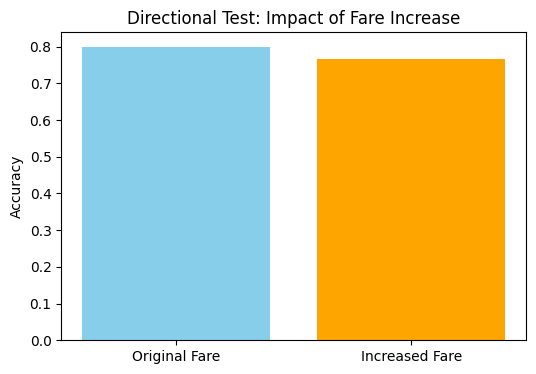

In [ ]:
# Visualization
plt.figure(figsize=(6, 4))
plt.bar(['Original Fare', 'Increased Fare'], [accuracy_rf, accuracy_directional], color=['skyblue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Directional Test: Impact of Fare Increase')
plt.show()

Slice-Based Evaluation: Analyze performance on specific data subsets (e.g., gender, age group) to uncover disparities.

In [ ]:
# --- 4. Slice-based evaluation: Male vs Female ---
X_test_male = X_test[X_test['Sex_male'] == 1]  # Male passengers
y_test_male = y_test[X_test['Sex_male'] == 1]
y_pred_male = model_rf.predict(X_test_male)
accuracy_male = accuracy_score(y_test_male, y_pred_male)

X_test_female = X_test[X_test['Sex_male'] == 0]  # Female passengers
y_test_female = y_test[X_test['Sex_male'] == 0]
y_pred_female = model_rf.predict(X_test_female)
accuracy_female = accuracy_score(y_test_female, y_pred_female)

print(f"Accuracy for male passengers: {accuracy_male}")
print(f"Accuracy for female passengers: {accuracy_female}")

Accuracy for male passengers: 0.8
Accuracy for female passengers: 0.7971014492753623


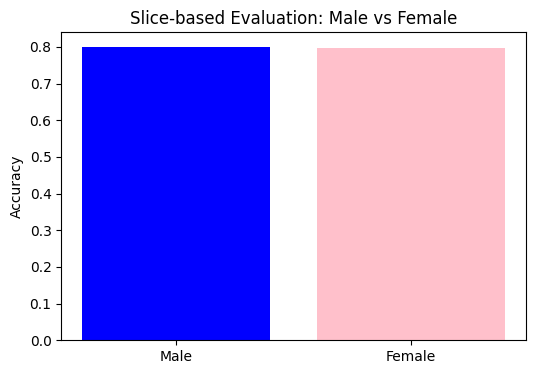

In [ ]:
# Visualization
plt.figure(figsize=(6, 4))
plt.bar(['Male', 'Female'], [accuracy_male, accuracy_female], color=['blue', 'pink'])
plt.ylabel('Accuracy')
plt.title('Slice-based Evaluation: Male vs Female')
plt.show()


Evaluate performance based on age (e.g., passengers under 30 years old)

In [ ]:
# --- 5. Slice-based evaluation: Age < 30 vs Age >= 30 ---
X_test_under_30 = X_test[X_test['Age'] < 30]  # Passengers under 30
y_test_under_30 = y_test[X_test['Age'] < 30]
y_pred_under_30 = model_rf.predict(X_test_under_30)
accuracy_under_30 = accuracy_score(y_test_under_30, y_pred_under_30)

X_test_over_30 = X_test[X_test['Age'] >= 30]  # Passengers 30 or older
y_test_over_30 = y_test[X_test['Age'] >= 30]
y_pred_over_30 = model_rf.predict(X_test_over_30)
accuracy_over_30 = accuracy_score(y_test_over_30, y_pred_over_30)

print(f"Accuracy for passengers under 30: {accuracy_under_30}")
print(f"Accuracy for passengers 30 or older: {accuracy_over_30}")

Accuracy for passengers under 30: 0.8454545454545455
Accuracy for passengers 30 or older: 0.7246376811594203


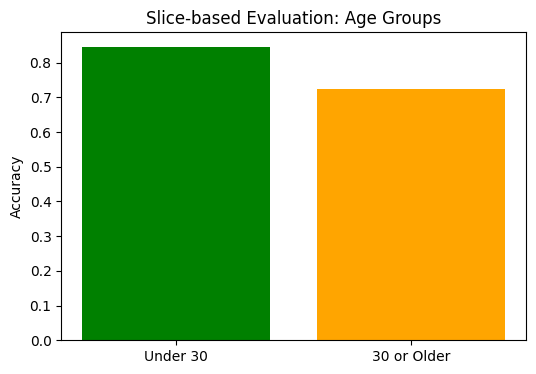

In [ ]:
# Visualization
plt.figure(figsize=(6, 4))
plt.bar(['Under 30', '30 or Older'], [accuracy_under_30, accuracy_over_30], color=['green', 'orange'])
plt.ylabel('Accuracy')
plt.title('Slice-based Evaluation: Age Groups')
plt.show()